In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

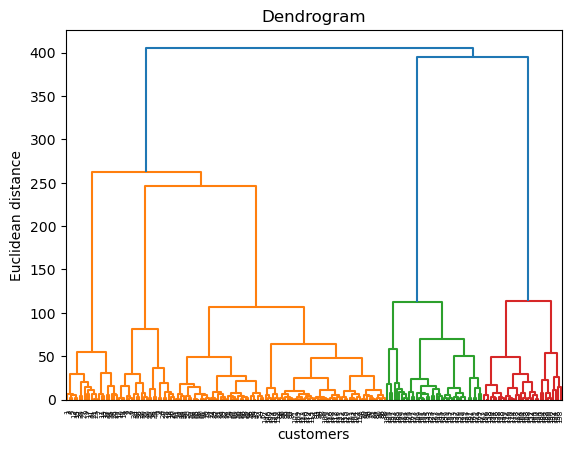

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
X=dataset.iloc[:, [3, 4]].values
dendrogram=sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("customers")
plt.ylabel("Euclidean distance")
plt.show()

In [14]:
#how do we find the thr to get an automatic cluster 
from scipy.cluster.hierarchy import linkage
Z = linkage(X, method="ward")  
heights = Z[:, 2]
jump_i = np.argmax(np.diff(heights))
thr = (heights[jump_i] + heights[jump_i+1]) / 2
thr

np.float64(328.7111458499819)

In [22]:
 
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=300,
                                n_clusters=None, linkage="ward")
model.fit(X)
print("Clusters:", model.n_clusters_)
labels = model.labels_


Clusters: 3


In [25]:
model=AgglomerativeClustering(n_clusters=5)
label=model.fit_predict(X)
supervised=dataset
supervised['cluster_group']=label
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [19]:
supervised.to_csv("cluster_agg.csv",index=False)

C:\Users\Nishok\miniconda3\envs\ml_env\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


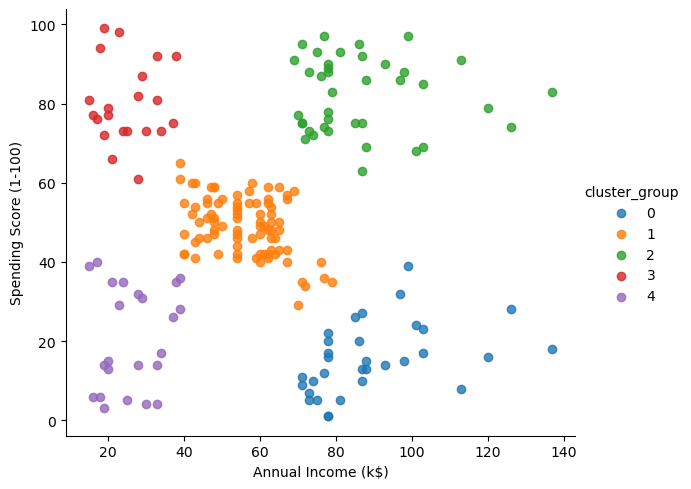

In [24]:
import seaborn as sns
xcol  = supervised.columns[3]
ycol  = supervised.columns[4]
huecol = supervised.columns[5]

facet = sns.lmplot(
    data=supervised,
    x=xcol, y=ycol, hue=huecol,
    fit_reg=False,        
    legend=True,
    legend_out=True,      
    height=5, aspect=1.2
)

In [27]:
from sklearn.metrics import silhouette_score
print("MBK silhouette:", silhouette_score(X, label))

MBK silhouette: 0.5529945955148897
